Task a: Exploring the Data:

Load and explore the provided data. Compute the mean, standard deviation and median of the STAI-Y2 scores (trait anxiety).

Given a cutoff score of 43 (i.e. STAI ≤ 43 is healthy), how many participants would be considered healthy controls? Report the indices of the control subjects. We know that the first 25 participants were recruited from the anxious population, and the last 25 from the calm population. Based on the above cutoff, do the participants fit in the correct group?

Note: for the rest of the assignment we will consider the first 25 participants as the high anxious ones, and the last 25 as the low anxious ones.
Compute the number of times each participant choose option A. Report the average of this number (or percentage) across all subjects. What is the expected number of aversive sounds experienced by participants who respond randomly throughout the experiment? Did our participants perform the task well?

Hint: the proportion of times subject 3 chose option A is about 20%.

In [5]:
import numpy as np
import pandas as pd
%autoreload 2
from src.task1 import *
from src.task2 import *
from src.task3 import *
from src.task4 import *
from src.task5 import *
from src.task6 import *


In [6]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
stai = pd.read_csv('/Users/maxoliverstapyltonnorris/Desktop/datsci/ccns/Modelling-Anxiety-using-RL-/data_2023/stai_scores.csv',header=None)
stai.columns=['score']
control,high,low = filter_healthy(stai)
choices,s_t,e_t,s_f,sf_tf = number_choosing_a('/Users/maxoliverstapyltonnorris/Desktop/datsci/ccns/Modelling-Anxiety-using-RL-/data_2023/inst_choices.csv')


In [ ]:
# Assuming 'stai' is the DataFrame you want to analyze
mean = stai.mean()
std = stai.std()
median = stai.median()


In [ ]:
choices['sum_of_one'].mean()

In [ ]:
number_of_aorb=160*0.5
total_aversive=number_of_aorb*0.3125+number_of_aorb*0.6875
total_aversive

Task 2 - Simulation

Since we are working with a generative model, we are able to simulate data, which can be extremely useful. Use equations eq. (1) and eq. (2) to write a function that lets you generate data from known parameters (the parameter values should be an input to the function). Generate the outcomes with probabilities which are changing every 40 trials as described in the introduction.
Hint: You can take inspiration from the code from the lectures to help you get started.
Simulate 160 choices with parameter settings α = 0.4, β = 7 and V0 = 0.5 for both options a number of times. (Choose a reasonable number so you can average the simulations). Illustrate the average evolution of values V (A) and V (B). Illustrate the average evolution of the difference in V values of the two stimuli (i.e. show how V (A)−V (B) changes, on average, over the course of the simulated experiments). Very briefly explain what is observed and why the shape of this evolution makes sense.
Hint: The average number of aversive sounds from a large number of simulations using the parameter values stated above should be around 58.

In [ ]:
choice,outcomes,V_a,V_b = generate_data(0.4,7)

In [ ]:
df_sims=simulation_df(0.4,7,1000)

Task (c): Exploring parameter settings (7)
Simulate 160 choices several times for a number of different parameter settings. Systematically vary settings of α and β to explore how different values affect the average number of aversive stimuli received. Plot the average number of aversive stimuli received as a function of the parameter settings, which means there will be three dimensions. Choose sensible ranges for the parameters (e.g. 0 < α < 1 and 0 < β < 10).
Briefly describe your precise approach and comment on how the expected performance during the experiment is related to different settings of the parameters.

In [ ]:
plot_alpha_beta()

Task (d): Likelihood function (6)
To find the parameter values that best capture each participant’s behaviour, we need to define the likelihood of the parameters. Write a function that takes as input the data (choices and outcomes) for an individual and a vector of parameters (learning rate and inverse temperature) and returns the negative log likelihood (NLL) of these parameters (note that θ is the parameter vector containing both α and β):
NLL = − 􏰀 logp(c | V,θ). (3) c∈C hoices
Hint: You can take inspiration use the code from the lectures to help you get started.
Report the NLL for the 4th and the 5th participant using parameter settings α = 0.4, β = 7, V0 = 0.5. Hint: If you compute the NLL for the 9th participant using the above parameters it should be around 61.

In [8]:
outcomes_df = outcomes_df('/Users/maxoliverstapyltonnorris/Desktop/datsci/ccns/Modelling-Anxiety-using-RL-/data_2023/inst_outcomes.csv')
choices_drop=choices.drop(columns=['average_ones_per_row','sum_of_one'])

In [ ]:
likelihoods = whole_df(choices_drop,outcomes_df,stai)

In [ ]:
likelihoods

In [ ]:
outcomes_df.iloc[8,:]
choices_drop.iloc[8,:]

In [ ]:
fifth = NLL(choices_drop.iloc[3,:],outcomes_df.iloc[3,:],(0.4,7,0.5))

In [ ]:
fifth

In [ ]:
df_optimal = param_finder(choices_drop,outcomes_df)

In [ ]:
model_fitting(df_optimal)


Task (g): Parameter recovery (9)
We now want to check the reliability and identifiability of our parameter estimates. Sample 50 sets of parameter values of learning rate and inverse temperature from a multivariate normal distributions. Choose sensible numbers for the mean of this distribution and describe how you chose them; choose small numbers
4
for the variance (e.g. 0.01 and 0.5 for α and β respectively); set the covariance to zero. Illustrate the sampled values and highlight and exclude (resample) nonsensical values.
Use the sampled parameter values to simulate 50 sets of data (as in Task (b)). Fit new parameter values to these simulated data sets (as in Task (e)). Calculate, report and illustrate the Pearson’s correlation between the parameter values you used to simulate the data and the parameter values that you obtained from fitting the model to the simulated data.
Repeat this process 5 times and report the Pearson’s correlation each time (there is no need for you to plot the sampled values all 5 times, the correlation coefficients are enough).
Comment briefly. Does this parameter recovery simulation meet your expectations? Explore and describe how the number of trials and the number of simulated data sets affects the performance of the parameter recovery.


In [ ]:
a_mean=df_optimal['optimized_alpha'].mean()
b_mean=df_optimal['optimized_beta'].mean()
var=(0.01,0.5)
samples=multi_variate(a_mean,b_mean,var[0],var[1])

In [ ]:
choices_reconstructed,outcomes_reconstructed=param_reconstruction(samples)

In [ ]:
df_optimal_reconstructed = param_finder(choices_reconstructed,outcomes_reconstructed)

Task (h): Alternative model (9)
In addition to model 1, which you already implemented, we will now be considering an additional model. Model 2 introduces a parameter A. What is the effect of A in this model? How it can be interpreted?
V(t+1) =A×V(t) +α×(o(t) −V(t)) (4) iii
Action selection for this model is again performed by the same softmax equation described in eq. (2) exp(−β × V (t))
p(action A | V (t), β) = A . (5) exp(−β × V (t)) + exp(−β × V (t))
 1. Implement simulation and (negative) log likelihood functions for this new model.
2. Fit the new model (use α = 0.4, β = 5, A = 0.5 as initial values). Illustrate the fitted parameter values. Are the results surprising or as expected? Can you explain them? What can be done if the results are not as expected?

In [ ]:
likelihood_alt = whole_df_alt(choices_drop,outcomes_df,stai)

In [11]:
ideal_params_alt = param_finder_alt(choices_drop,outcomes_df)

Optimization terminated successfully.
         Current function value: 48.705924
         Iterations: 124
         Function evaluations: 221
Optimized parameters: [0.79460462 5.04477851 0.5391102  1.14875515]
Optimization terminated successfully.
         Current function value: 52.858091
         Iterations: 237
         Function evaluations: 391
Optimized parameters: [1.5537007  4.39171834 0.50831724 0.55651986]
Optimization terminated successfully.
         Current function value: 55.459074
         Iterations: 115
         Function evaluations: 205
Optimized parameters: [0.99859862 3.95435306 0.3652085  0.68409968]
Optimization terminated successfully.
         Current function value: 80.600188
         Iterations: 285
         Function evaluations: 479
Optimized parameters: [5.30795324 2.65856413 0.8734638  0.12627484]
Optimization terminated successfully.
         Current function value: 50.487083
         Iterations: 112
         Function evaluations: 185
Optimized parameters: [

Mean alpha value: 0.69
Variance of alpha values: 0.50
Mean beta value: 5.71
Variance of beta values: 8.61
Mean A value: 0.92
Variance of A values: 0.92


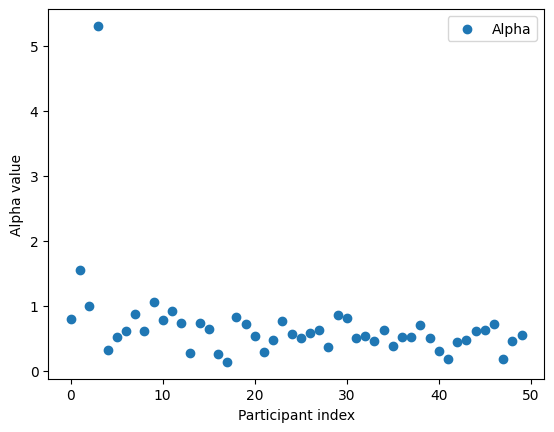

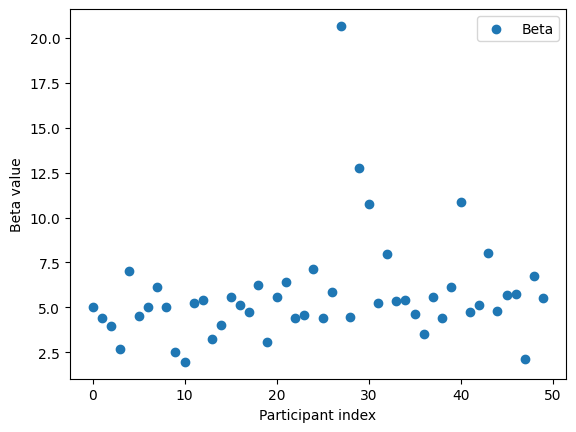

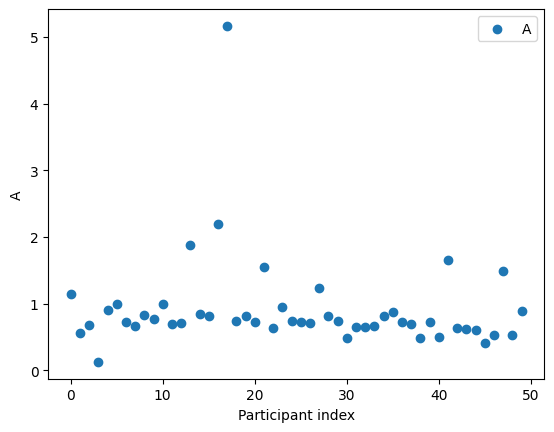

Pearson's correlation coefficient between alpha and beta: -0.14
Pearson's correlation coefficient between alpha and beta within high anxious group: -0.39
Pearson's correlation coefficient between alpha and beta within low anxious group: 0.39
Alpha t-statistic: 1.6694420097859322
Alpha degrees of freedom: 48
Alpha p-value: 0.10732215573169972
Beta t-statistic: -2.369103372435506
Beta degrees of freedom: 48
Beta p-value: 0.024447916606585116


In [12]:
model_fitting_alt(ideal_params_alt )